In [1]:
#import essential library
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
# Drop unnecessary data from the dataset
df=df.drop('fbs',axis=1)
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,106,0,1.9,1,3,2,0


In [5]:
# check missing value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

           restecg      thalach        exang      oldpeak        slope  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529756   149.114146     0.336585     1.071512     1.385366   
std       0.527878    23.005724     0.472772     1.175053     0.617755   
min       0.000000    71.000000     0.000000  

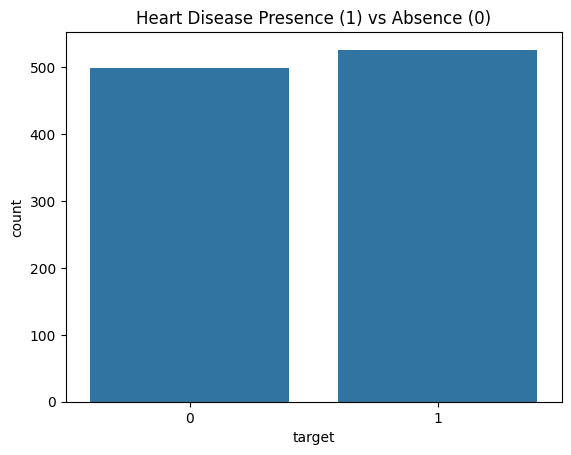

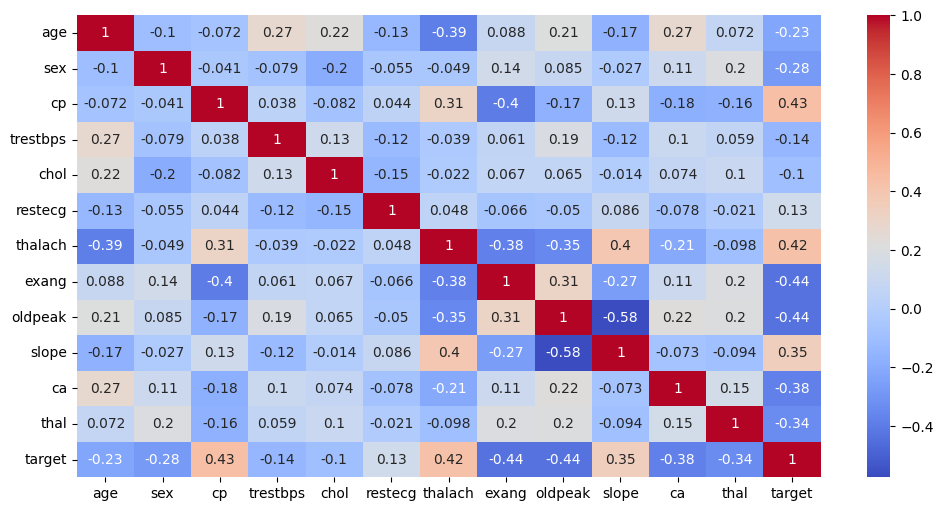

In [6]:
# Step 2: EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical summary
print(df.describe())

# Countplot for target variable
sns.countplot(x='target', data=df)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# separaate dependent and independent variable
X = df.drop(columns=["target"])
y = df["target"]
    

In [8]:
# splitting Train-test model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
# Identify numeric and categorical columns
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "restecg", "exang", "slope", "ca", "thal"]

In [10]:
# Features scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [11]:
# Model Training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



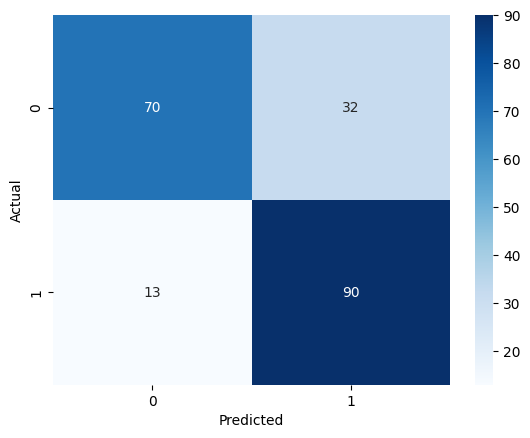

In [12]:
# Step 6: Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
# Step 7: Predict New Data
import numpy as np

# Example: Single patient data
sample_data = np.array([[52, 1, 0, 130, 200, 1, 150, 0, 2.5, 2, 0, 2]])
sample_data_scaled = scaler.transform(sample_data)

prediction = model.predict(sample_data_scaled)
print("Heart Disease Prediction:", "Yes" if prediction[0]==1 else "No")


Heart Disease Prediction: No


In [16]:
# Step 8: Save Model
import pickle

pickle.dump(model, open("heart_disease_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
